nqubits list: [8]
Training data list: [4, 6, 8]
--------------------------------------------------
training_size = 4
r_corrupt_values = [0.0, 0.25, 0.5, 0.75, 1.0]
test_error_list = [array(0.236), array(0.465), array(0.627), array(0.73), array(0.754)]
--------------------------------------------------
--------------------------------------------------
training_size = 6
r_corrupt_values = [0.0, 0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333334, 1.0]
test_error_list = [array(0.18), array(0.451), array(0.639), array(0.708), array(0.739), array(0.726), array(0.765)]
--------------------------------------------------
--------------------------------------------------
training_size = 8
r_corrupt_values = [0.0, 0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875, 1.0]
test_error_list = [array(0.117), array(0.308), array(0.44), array(0.55), array(0.658), array(0.675), array(0.749), array(0.77), array(0.744)]
--------------------------------------------------


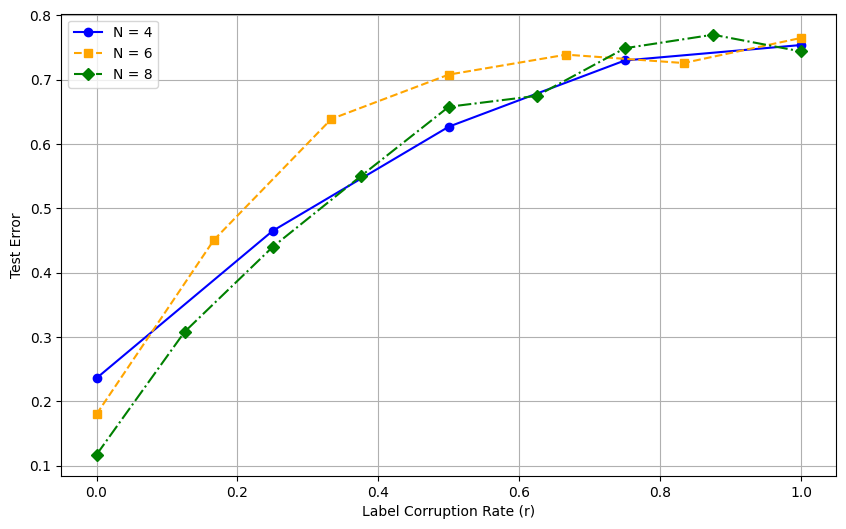

In [1]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt

# Define the parent directory containing subfolders for different label types
PARENT_DIRECTORY = r"C:\Users\deols\OneDrive\Documents\GitHub\qml_rethinking_gen\partially_corrupted_labels"
label_type = "partially_corrupted_labels"

# Regular expressions to extract parameters from filenames
NQUBITS_PATTERN = re.compile(r"nqubits_(\d+)")
TRAINING_DATA_PATTERN = re.compile(r"training_data_(\d+)")

# Define colors, markers, and linestyles for plotting
PLOT_STYLES = {
    # "colors": ['red', 'black', 'g', 'm', 'y', 'k'],
    "colors": ['blue', 'orange', 'g', 'm', 'y', 'k'],
    "markers": ['o', 's', 'D', '^', 'v', 'p', '*', 'x'],
    "linestyles": ['-', '--', '-.', ':']
}
PLOT_LABELS = ["N = 4",
"N = 6",
"N = 8",
]

# Initialize the plot
plt.figure(figsize=(10, 6))

# Define labels for the plot
folder_path = os.path.join(PARENT_DIRECTORY, "qml_error_save")

if not os.path.exists(folder_path):
    print(f"Warning: {folder_path} does not exist. Skipping.")
    exit()


# Extract unique nqubits and training_data values
nqubits, training_data = set(), set()

for filename in os.listdir(folder_path):
    if filename.endswith(".txt"):
        if (match := NQUBITS_PATTERN.search(filename)):
            nqubits.add(int(match.group(1)))
        if (match := TRAINING_DATA_PATTERN.search(filename)):
            training_data.add(int(match.group(1)))

# Sort values and filter nqubits (keeping only 8)
training_data_list = sorted(training_data)
nqubits_list = sorted(nqubits)

print(f"nqubits list: {nqubits_list}")
print(f"Training data list: {training_data_list}")

# Process data and plot
for nqubit in nqubits_list:
    
    
    for index , training_size in enumerate(training_data_list):
        r_corrupt_values, test_error_list = [], []
        for i in range(training_size+1):
            r_corrupt = float(i/training_size)
            filename_base = f"{label_type}_nqubits_{nqubit}_training_data_{training_size}_i_{i}"
            test_error_path = os.path.join(folder_path, f"{filename_base}_test_error.txt")
            try:
                test_error = np.loadtxt(test_error_path)                
                r_corrupt_values.append(r_corrupt)
                test_error_list.append(test_error)                
                #print(f"{filename_base}: 'r_corrupt' = {r_corrupt}, test_error = {test_error}")
            except Exception as e:
                print(f"Error loading files for {filename_base}: {e}")
                continue
    
        if r_corrupt_values and test_error_list:
            print("-"*50)
            print(f"training_size = {training_size}")
            print(f"r_corrupt_values = {r_corrupt_values}")
            print(f"test_error_list = {test_error_list}")
            print("-"*50)
            plt.plot(r_corrupt_values, test_error_list, label=PLOT_LABELS[index],
                        marker=PLOT_STYLES['markers'][index],
                        color=PLOT_STYLES['colors'][index],
                        linestyle=PLOT_STYLES['linestyles'][index])

# Configure and display the plot
plt.xlabel('Label Corruption Rate (r)')
plt.ylabel('Test Error')
plt.legend()
plt.grid(True)
plt.show()
